In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
#import simtk.openmm as mm
#from msmbuilder.decomposition import tICA, PCA

In [3]:
#dataFull = np.loadtxt('ala4_explicit/COLVAR_md_explicit_10ns')
dataFull = np.loadtxt('COLVAR_10k')

In [4]:
data = dataFull[:,1:7]
sumabs=dataFull[:,-1]


In [5]:
print(data)
print(sumabs)

[[-2.04987  2.44583 -1.27433 -0.20764 -1.30052 -0.61203]
 [-2.11034  2.44198 -1.29206 -0.13455 -1.25049 -0.22291]
 [-2.66172  2.83348 -1.58355  0.09288 -1.25534 -0.37196]
 ...
 [-1.37236  3.08933 -2.28669  0.48706 -2.65358  2.76742]
 [-2.60319  3.03822 -1.24769 -0.07305 -1.59949  0.54397]
 [-3.12554  2.55473 -0.81261 -0.78804 -1.47179  0.02949]]
[0.2574  0.27747 0.30722 ... 0.2943  0.29417 0.51295]


In [6]:
angles_avg=np.average(data,axis=0)

In [7]:
data - angles_avg

array([[-0.47782072,  1.47881132,  0.35072572, -1.0253245 ,  0.49594324,
        -1.6245682 ],
       [-0.53829072,  1.47496132,  0.33299572, -0.9522345 ,  0.54597324,
        -1.2354482 ],
       [-1.08967072,  1.86646132,  0.04150572, -0.7248045 ,  0.54112324,
        -1.3844982 ],
       ...,
       [ 0.19968928,  2.12231132, -0.66163428, -0.3306245 , -0.85711676,
         1.7548818 ],
       [-1.03114072,  2.07120132,  0.37736572, -0.8907345 ,  0.19697324,
        -0.4685682 ],
       [-1.55349072,  1.58771132,  0.81244572, -1.6057245 ,  0.32467324,
        -0.9830482 ]])

In [8]:
shape(data)

(10000, 6)

In [9]:
#angleCenter_sincos = []
sincos = []
for i in range(shape(data)[0]):
    
    #angleCenter_sincos.append([ k for k in 
    #                           list(np.cos(data[i] - angles_avg))
    #                           +list(np.sin(data[i] - angles_avg))
    #                          ])
    sincos.append([ k for k in 
                               list(np.cos(data[i] - angles_avg))
                               +list(np.sin(data[i] - angles_avg))
                              ])

In [10]:
angleCenter_sincos[0]

[0.8879991604403527,
 0.09185533978703986,
 0.9391236177029177,
 0.5188215064628989,
 0.8795202510206874,
 -0.05374596615390333,
 -0.4598450728856718,
 0.9957723618139878,
 0.34357943866387586,
 -0.8548825910214619,
 0.47586145887695824,
 -0.9985546410298154]

In [ ]:
angleCenter_sincos[0]

In [10]:
import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#x_train,x_test,y_train,y_test= train_test_split(x_sincos_centered, sumabs, test_size=0.2, random_state=42)
#x_train,x_test,y_train,y_test= train_test_split( array(angleCenter_sincos), sumabs, test_size=0.2, random_state=42)
x_train,x_test,y_train,y_test= train_test_split( array(sincos), sumabs, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape,y_test.shape )

(8000, 12) (8000,) (2000,)


In [11]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras import backend as K
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model

2.1.0


Using TensorFlow backend.


In [12]:
original_dim=12
inputs = Input(shape=(original_dim,),name='encoder_input')
latent_dim = 2
batch_size=100
epochs=500

    
x = Dense(8, activation='tanh')(inputs)
x = Dense(4, activation='tanh')(x)
x = Dense(1, activation='tanh')(x)
x = Dense(4, activation='tanh')(x)
x = Dense(8, activation='tanh')(x)
outputs = Dense(original_dim, activation='tanh')(x)

autoencoder = Model(inputs, outputs, name='autoencoder')

In [14]:
data = (x_test, y_test)

reconstruction_loss = mse(inputs, outputs)

autoencoder.add_loss(reconstruction_loss)

autoencoder.compile(optimizer='rmsprop')
autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_6 (Dense)              (None, 12)                

In [19]:
autoencoder_train= autoencoder.fit(x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))
autoencoder.save_weights('vae_mlp_explicit-1dz.h5')

Train on 8000 samples, validate on 2000 samples
Epoch 1/500
8000/8000 [==============================] - 0s 7us/step - loss: 0.1357 - val_loss: 0.1359
Epoch 2/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1357 - val_loss: 0.1359
Epoch 3/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1357 - val_loss: 0.1360
Epoch 4/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1356 - val_loss: 0.1357
Epoch 5/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1357 - val_loss: 0.1357
Epoch 6/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1356 - val_loss: 0.1356
Epoch 7/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1357 - val_loss: 0.1358
Epoch 8/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1357 - val_loss: 0.1361
Epoch 9/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1356 - val_loss: 0.1358
Epoch 10/500
8000/8000 [=

8000/8000 [==============================] - 0s 6us/step - loss: 0.1355 - val_loss: 0.1356
Epoch 80/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1355 - val_loss: 0.1356
Epoch 81/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1355 - val_loss: 0.1359
Epoch 82/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1355 - val_loss: 0.1360
Epoch 83/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1355 - val_loss: 0.1364
Epoch 84/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1355 - val_loss: 0.1356
Epoch 85/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1355 - val_loss: 0.1355
Epoch 86/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1355 - val_loss: 0.1366
Epoch 87/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1355 - val_loss: 0.1356
Epoch 88/500
8000/8000 [==============================] - 0s 6us/step - loss:

8000/8000 [==============================] - 0s 6us/step - loss: 0.1354 - val_loss: 0.1357
Epoch 158/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1354 - val_loss: 0.1357
Epoch 159/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1353 - val_loss: 0.1360
Epoch 160/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1353 - val_loss: 0.1356
Epoch 161/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1353 - val_loss: 0.1361
Epoch 162/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1353 - val_loss: 0.1364
Epoch 163/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1353 - val_loss: 0.1357
Epoch 164/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1353 - val_loss: 0.1364
Epoch 165/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1353 - val_loss: 0.1371
Epoch 166/500
8000/8000 [==============================] - 0s 6us/ste

8000/8000 [==============================] - 0s 7us/step - loss: 0.1352 - val_loss: 0.1356
Epoch 236/500
8000/8000 [==============================] - 0s 7us/step - loss: 0.1351 - val_loss: 0.1359
Epoch 237/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1351 - val_loss: 0.1362
Epoch 238/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1351 - val_loss: 0.1359
Epoch 239/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1351 - val_loss: 0.1363
Epoch 240/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1351 - val_loss: 0.1356
Epoch 241/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1352 - val_loss: 0.1358
Epoch 242/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1352 - val_loss: 0.1359
Epoch 243/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1351 - val_loss: 0.1357
Epoch 244/500
8000/8000 [==============================] - 0s 6us/ste

8000/8000 [==============================] - 0s 6us/step - loss: 0.1342 - val_loss: 0.1352
Epoch 314/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1342 - val_loss: 0.1361
Epoch 315/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1342 - val_loss: 0.1353
Epoch 316/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1342 - val_loss: 0.1355
Epoch 317/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1342 - val_loss: 0.1352
Epoch 318/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1342 - val_loss: 0.1356
Epoch 319/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1342 - val_loss: 0.1348
Epoch 320/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1343 - val_loss: 0.1346
Epoch 321/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1343 - val_loss: 0.1349
Epoch 322/500
8000/8000 [==============================] - 0s 6us/ste

8000/8000 [==============================] - 0s 6us/step - loss: 0.1340 - val_loss: 0.1345
Epoch 392/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1341 - val_loss: 0.1346
Epoch 393/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1340 - val_loss: 0.1348
Epoch 394/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1341 - val_loss: 0.1344
Epoch 395/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1340 - val_loss: 0.1347
Epoch 396/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1340 - val_loss: 0.1342
Epoch 397/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1340 - val_loss: 0.1348
Epoch 398/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1340 - val_loss: 0.1350
Epoch 399/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1340 - val_loss: 0.1344
Epoch 400/500
8000/8000 [==============================] - 0s 6us/ste

8000/8000 [==============================] - 0s 6us/step - loss: 0.1339 - val_loss: 0.1344
Epoch 470/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1339 - val_loss: 0.1351
Epoch 471/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1338 - val_loss: 0.1346
Epoch 472/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1339 - val_loss: 0.1346
Epoch 473/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1339 - val_loss: 0.1344
Epoch 474/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1339 - val_loss: 0.1342
Epoch 475/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1339 - val_loss: 0.1344
Epoch 476/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1339 - val_loss: 0.1346
Epoch 477/500
8000/8000 [==============================] - 0s 6us/step - loss: 0.1339 - val_loss: 0.1341
Epoch 478/500
8000/8000 [==============================] - 0s 6us/ste

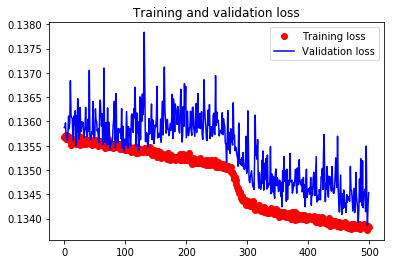

In [20]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs_plot = range(epochs)
plt.figure()
plt.plot(epochs_plot, loss, 'ro', label='Training loss')
plt.plot(epochs_plot, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
pred = autoencoder.predict(x_test)
xhat_train = autoencoder.predict(x_train)

In [22]:
pred.shape

(2000, 12)

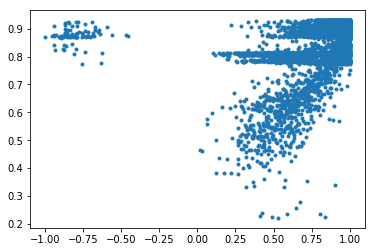

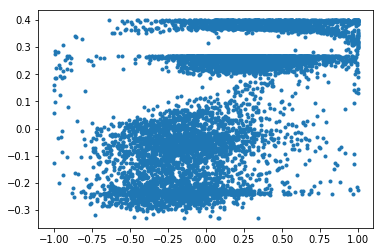

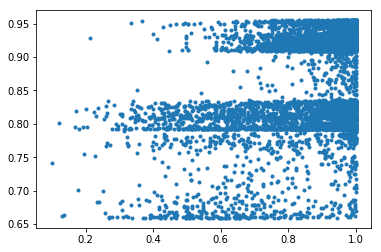

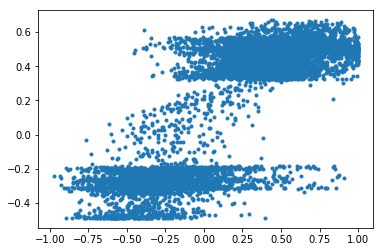

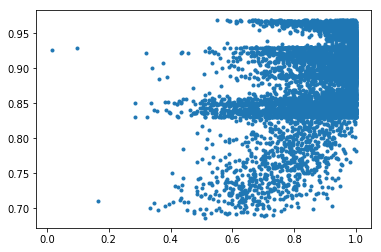

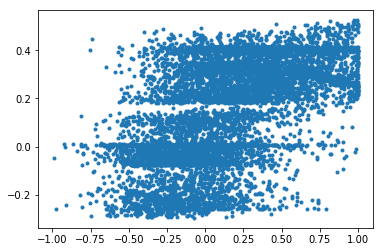

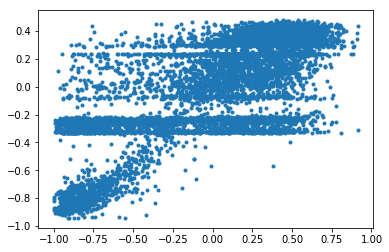

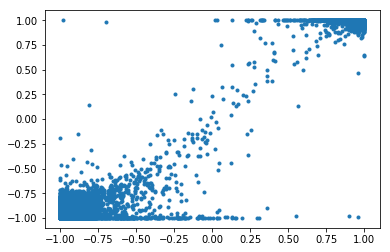

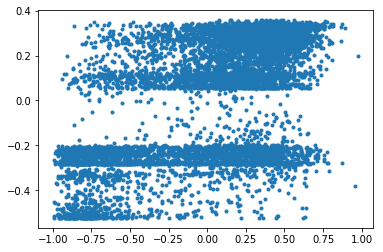

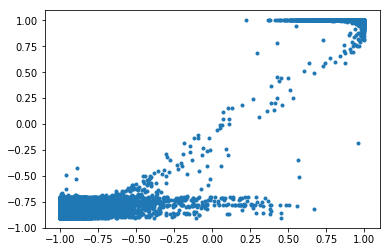

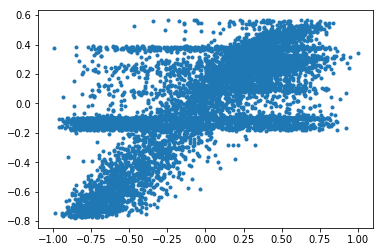

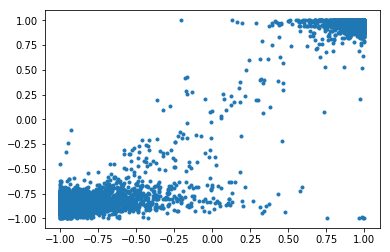

In [23]:
for i in range(12):
    plot(x_train[:,i],xhat_train[:,i],'.')
    show()

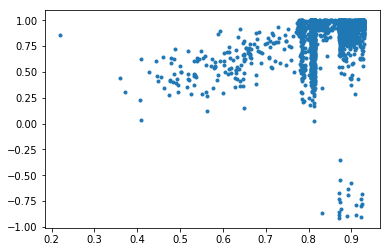

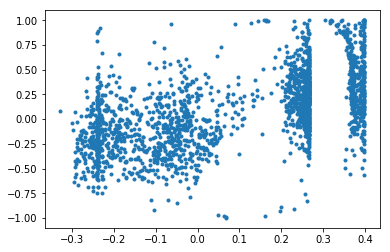

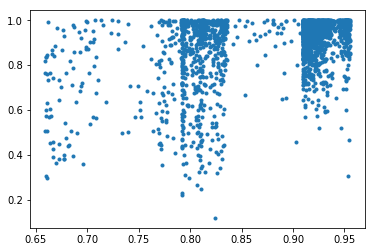

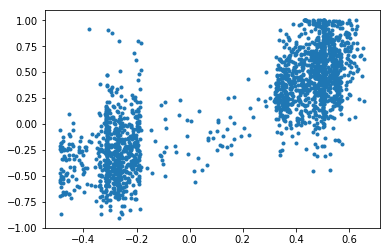

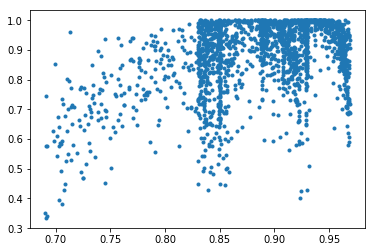

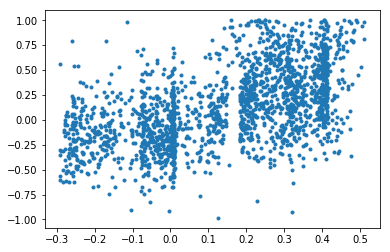

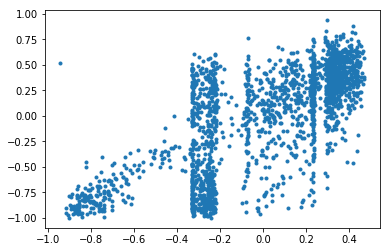

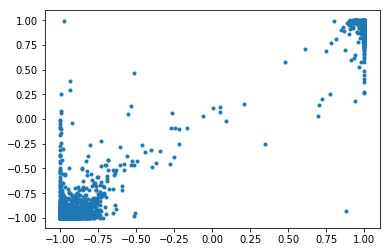

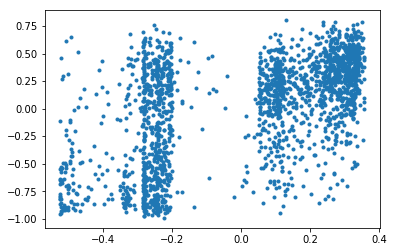

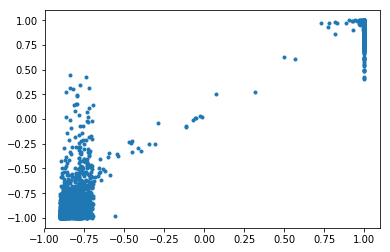

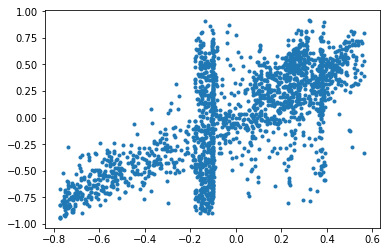

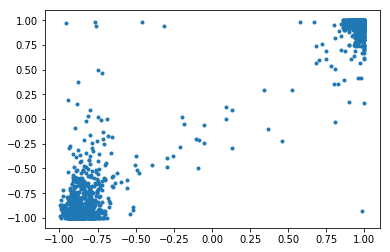

In [24]:
for i in range(12):
    plot(pred[:,i],x_test[:,i],'.')
    show()

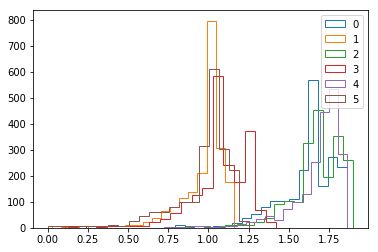

In [26]:
for i in range(0,6):
    hist(np.power(pred[:,i],2)+np.power(pred[:,1+6],2),bins=20, histtype='step',label=str(i))
legend()

In [ ]:
decoder_test=decoder.predict(z_test[2],batch_size=batch_size)

In [ ]:
print(len(decoder_test))

In [ ]:
plot(z_test[0],'.')

In [ ]:
z_train = encoder.predict(x_train, batch_size=batch_size)

In [ ]:
weights = vae.get_weights()

In [ ]:
for i in range(14): print(weights[i].shape)

In [ ]:
print(weights[0])

In [ ]:
first_layer_weights = weights[0]
first_layer_biases  = weights[1]
second_layer_weights = weights[2]
second_layer_biases  = weights[3]
third_layer_weights = weights[4]
third_layer_biases  = weights[5]

In [ ]:
np.savetxt('temp',weights[4].T,delimiter=',')

In [ ]:
weights[5]

In [ ]:
plot(y_train, z_train[0],'.')

In [ ]:
scatter(
    np.arctan2(x_train[:,1]-0.11089574722092439, x_train[:,0]-0.8373638540318044),
    np.arctan2(x_train[:,3]-0.6151028330760221, x_train[:,2]+ 0.3988736246362931),
    c=reshape(z_train[0],(800,)))
colorbar()

In [ ]:
scatter(x_train[:,11],reshape(z_train[0],(40000,)))